# Final Project Phase 3 Summary
This Jupyter Notebook (.ipynb) will serve as the skeleton file for your submission for Phase 3 of the Final Project. Complete all sections below as specified in the instructions for the project, covering all necessary details. We will use this to grade your individual code (Do this whether you are in a group or not). Good luck! <br><br>

Note: To edit a Markdown cell, double-click on its text.

## Jupyter Notebook Quick Tips
Here are some quick formatting tips to get you started with Jupyter Notebooks. This is by no means exhaustive, and there are plenty of articles to highlight other things that can be done. We recommend using HTML syntax for Markdown but there is also Markdown syntax that is more streamlined and might be preferable.
<a href = "https://towardsdatascience.com/markdown-cells-jupyter-notebook-d3bea8416671">Here's an article</a> that goes into more detail. (Double-click on cell to see syntax)

# Heading 1
## Heading 2
### Heading 3
#### Heading 4
<br>
<b>BoldText</b> or <i>ItalicText</i>
<br> <br>
Math Formulas: $x^2 + y^2 = 1$
<br> <br>
Line Breaks are done using br enclosed in < >.
<br><br>
Hyperlinks are done with: <a> https://www.google.com </a> or
<a href="http://www.google.com">Google</a><br>

# Data Collection and Cleaning


Transfer/update the data collection and cleaning you created for Phase II below. You may include additional cleaning functions if you have extra datasets. If no changes are necessary, simply copy and paste your phase II parsing/cleaning functions.


In [2]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests, re
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns

## Downloaded Dataset Requirement



In [3]:
def data_parser():

    ## reading downloaded csv files
    batting = pd.read_csv("Batting.csv",delimiter=",")
    people = pd.read_csv("People.csv", delimiter=",")

    people["nameFull"] = people["nameFirst"] + " " + people["nameLast"]

    ## dropping player records from years before 2000 for simplicity
    batting.drop(batting[batting.yearID < 2000].index,inplace=True)

    ## merging batting and people csvs to have one dataframe with both info
    batters_df = pd.merge(batting,people,how='left',on='playerID')

    ## dropping unnecessary columns and resetting indices
    batters_df.drop(["retroID","bbrefID",'birthYear', 'birthMonth', 'birthDay', 'birthCountry',
           'birthState', 'birthCity', 'deathYear', 'deathMonth', 'deathDay',
           'deathCountry', 'deathState', 'deathCity','stint','nameGiven'],inplace=True,axis=1)
    batters_df.reset_index(drop=True,inplace=True)

    ## making csv
    batters_df.to_csv("Batter Stats.csv",index=True)


############ Function Call ############
data_parser()

In [4]:
batter_stats = pd.read_csv("Batter Stats.csv",index_col=0)
batter_stats

,playerID,yearID,teamID,lgID,G,AB,R,H,2B,3B,...,GIDP,nameFirst,nameLast,weight,height,bats,throws,debut,finalGame,nameFull
0,abbotje01,2000,CHA,AL,80,215,31,59,15,1,...,2.0,Jeff,Abbott,190.0,74.0,R,L,1997-06-10,2001-09-29,Jeff Abbott
1,abbotku01,2000,NYN,NL,79,157,22,34,7,1,...,2.0,Kurt,Abbott,180.0,71.0,R,R,1993-09-07,2001-04-13,Kurt Abbott
2,abbotpa01,2000,SEA,AL,35,5,1,2,1,0,...,0.0,Paul,Abbott,185.0,75.0,R,R,1990-08-21,2004-08-07,Paul Abbott
3,abreubo01,2000,PHI,NL,154,576,103,182,42,10,...,12.0,Bobby,Abreu,220.0,72.0,L,R,1996-09-01,2014-09-28,Bobby Abreu
4,aceveju01,2000,MIL,NL,62,1,1,0,0,0,...,0.0,Juan,Acevedo,245.0,74.0,R,R,1995-04-30,2003-08-05,Juan Acevedo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32913,zimmebr01,2022,TOR,AL,77,76,11,8,4,0,...,0.0,Bradley,Zimmer,185.0,76.0,L,R,2017-05-16,2022-10-05,Bradley Zimmer
32914,zimmebr01,2022,PHI,NL,9,16,4,4,1,0,...,0.0,Bradley,Zimmer,185.0,76.0,L,R,2017-05-16,2022-10-05,Bradley Zimmer
32915,zimmebr01,2022,TOR,AL,23,13,3,1,0,0,...,0.0,Bradley,Zimmer,185.0,76.0,L,R,2017-05-16,2022-10-05,Bradley Zimmer
32916,zimmebr02,2022,BAL,AL,15,0,0,0,0,0,...,0.0,Bruce,Zimmermann,215.0,73.0,L,L,2020-09-17,2022-09-05,Bruce Zimmermann


## Web Collection Requirement \#1


In [5]:
def web_parser1():

  ## getting api data
  api_url = 'https://api.sportsdata.io/v3/mlb/scores/json/Players?key=76ee08fa3709417c85ec4abc607fe42a'
  response = requests.get(api_url)
  data = response.json()

  ## filtering data: dropping minor league players, non rostered players and pitchers
  unfiltered_data = [player for player in data if player['Status'] != 'Minors' and player['Status'] != '40 Man Active']
  filtered_data = [player for player in unfiltered_data if player['PositionCategory'] != 'P']

  ## making dataframe with filtered data
  player_profiles_df = pd.DataFrame(filtered_data)

  ## dropping unnecessary columns
  columns_to_drop = ['SportsDataID', 'Salary', 'PhotoUrl', 'SportRadarPlayerID', 'RotoworldPlayerID', 'RotoWirePlayerID', 'FantasyAlarmPlayerID',
                     'StatsPlayerID', 'XmlTeamPlayerID', 'InjuryStatus', 'InjuryBodyPart', 'InjuryStartDate', 'InjuryNotes', 'FanDuelPlayerID', 'DraftKingsPlayerID',
                     'YahooPlayerID', 'UpcomingGameID', 'FanDuelName', 'DraftKingsName', 'YahooName', 'GlobalTeamID', 'FantasyDraftName', 'FantasyDraftPlayerID',
                     'UsaTodayPlayerID', 'UsaTodayHeadshotUrl', 'UsaTodayHeadshotNoBackgroundUrl', 'UsaTodayHeadshotUpdated', 'UsaTodayHeadshotNoBackgroundUpdated',
                     'SportsDirectPlayerID', 'MLBAMID']
  player_profiles_df = player_profiles_df.drop(columns_to_drop, axis=1)

  ## modifying columns and setting nulls
  player_profiles_df['ProDebut'] = player_profiles_df['ProDebut'].str.split('T').str[0]
  player_profiles_df['BirthDate'] = player_profiles_df['BirthDate'].str.split('T').str[0]
  player_profiles_df.replace('', np.nan, inplace=True)

  player_profiles_df["FullName"] = player_profiles_df["FirstName"] + " " + player_profiles_df["LastName"]

  player_profiles_df = pd.merge(player_profiles_df, batter_stats[["playerID","nameFull"]],
                                how='left',left_on='FullName', right_on="nameFull")
  player_profiles_df = player_profiles_df.drop_duplicates(subset="playerID")


  ## making csv
  player_profiles_df.to_csv('Player Profiles.csv', index=False)



############ Function Call ############
web_parser1()

In [6]:
player_profiles = pd.read_csv("Player Profiles.csv", delimiter=",",index_col=0)
player_profiles

,Status,TeamID,Team,Jersey,PositionCategory,Position,FirstName,LastName,BatHand,ThrowHand,...,BirthCity,BirthState,BirthCountry,HighSchool,College,ProDebut,Experience,FullName,playerID,nameFull
PlayerID,,,,,,,,,,,,,,,,,,,,,
10000029,Active,14,ARI,13.0,IF,SS,Nick,Ahmed,R,R,...,Springfield,MA,USA,NaN,Connecticut,2014-06-29,9,Nick Ahmed,ahmedni01,Nick Ahmed
10000030,10-Day Injured List,21,LAA,23.0,IF,2B,Brandon,Drury,R,R,...,Grants Pass,OR,USA,Grants Pass (OR),None,2015-09-01,8,Brandon Drury,drurybr01,Brandon Drury
10000031,Active,31,STL,46.0,IF,1B,Paul,Goldschmidt,R,R,...,Wilmington,DE,USA,NaN,Texas State,2011-08-01,12,Paul Goldschmidt,goldspa01,Paul Goldschmidt
10000040,Active,1,LAD,6.0,OF,LF,David,Peralta,L,L,...,Valencia,NaN,Venezuela,NaN,None,2014-06-01,9,David Peralta,peralda01,David Peralta
10000041,10-Day Injured List,13,SEA,8.0,OF,LF,AJ,Pollock,R,R,...,Hebron,CT,USA,NaN,Notre Dame,2012-04-18,11,AJ Pollock,polloaj01,AJ Pollock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10012277,Active,31,STL,21.0,OF,RF,Lars,Nootbaar,L,R,...,El Segundo,CA,USA,NaN,Southern California,2021-06-22,2,Lars Nootbaar,nootbla01,Lars Nootbaar
10012310,Active,30,HOU,21.0,IF,C,Yainer,Diaz,R,R,...,Azua,NaN,Dominican Republic,NaN,None,2022-09-02,1,Yainer Diaz,diazya02,Yainer Diaz
10012442,Active,10,CLE,17.0,OF,RF,Will,Brennan,L,L,...,Colorado Springs,CO,USA,NaN,Kansas State,2022-09-21,1,Will Brennan,brennwi02,Will Brennan


## Web Collection Requirement #2

In [7]:
def web_parser2():
    ## making dataframe
    salaries_df=pd.DataFrame()

    ## looping through pages on website for 2020-2022 data
    for n in range(20,23):
        ## gettting html to scrape
        url = f'https://www.spotrac.com/mlb/rankings/20{n}/salary/'
        data = {
            'ajax': 'true',
            'mobile': 'false'
        }
        soup = BeautifulSoup(requests.post(url, data=data).content, 'html.parser')
        table = soup.find("table").text

        ## pulling out names, salaries and years for each player
        t1 = table.strip()
        players = re.findall(r"[A-Z][a-zA-Z]{2,}\s[a-zA-Z]{2,}",t1)[2:]
        salaries = re.findall(r"\$([\d,]*)",t1)
        year = [int(f"20{n}") for i in range(len(players))]

        ## making rank for players because the data comes ordered
        rank = list(range(1,len(players)+1))

        ## adding data to dataframe
        data = list(zip(players,salaries,year,rank))
        if salaries_df.empty:
            salaries_df = pd.DataFrame(data,columns=["Player","Salary","Year","Rank"])
        else:
            df_new = pd.DataFrame(data,columns=["Player","Salary","Year","Rank"])
            salaries_df = pd.concat([salaries_df,df_new],ignore_index=True)

    ######## making player_profiles dataframe including pitchers to use for salaries dataframe
    api_url = 'https://api.sportsdata.io/v3/mlb/scores/json/Players?key=76ee08fa3709417c85ec4abc607fe42a'
    response = requests.get(api_url)
    data = response.json()
    unfiltered_data = [player for player in data if player['Status'] != 'Minors' and player['Status'] != '40 Man Active']
    player_profiles_with_pitchers = pd.DataFrame(unfiltered_data)
    player_profiles_with_pitchers["FullName"] = player_profiles_with_pitchers["FirstName"] + " " + player_profiles_with_pitchers["LastName"]
    ########################

    ## adding positions to dataframe using the player_profiles dataframe
    salaries_df = pd.merge(salaries_df,player_profiles_with_pitchers[["FullName","Position"]],
                           how='left',left_on='Player',right_on='FullName')
    salaries_df = salaries_df.drop(columns=["FullName"],axis=1)

    ## filtering out pitchers, rows with NaN, and reindexing
    salaries_df = salaries_df[salaries_df["Position"] != "SP"]
    salaries_df = salaries_df[salaries_df["Position"] != "RP"]
    salaries_df = salaries_df[salaries_df["Position"] != "CP"]
    salaries_df = salaries_df.dropna(axis=0)
    salaries_df.index = list(range(len(salaries_df)))

    salaries_df["Salary"] = salaries_df["Salary"].str.replace(",","").astype(int)

    salaries_df = pd.merge(salaries_df, batter_stats[["playerID", "nameFull","yearID"]],
                           how='left', left_on=['Player','Year'], right_on=['nameFull','yearID'])
    ## to csv
    salaries_df.to_csv("Player Salaries 2020-2022.csv",index=True)


############ Function Call ############
web_parser2()

In [8]:
salaries = pd.read_csv("Player Salaries 2020-2022.csv",index_col=0)
salaries

,Player,Salary,Year,Rank,Position,playerID,nameFull,yearID
0,Mike Trout,37766667,2020,1,CF,troutmi01,Mike Trout,2020.0
1,Nolan Arenado,35025000,2020,4,3B,arenano01,Nolan Arenado,2020.0
2,Manny Machado,32000000,2020,8,3B,machama01,Manny Machado,2020.0
3,Miguel Cabrera,30000000,2020,11,DH,cabremi01,Miguel Cabrera,2020.0
4,Jose Altuve,29000000,2020,14,2B,altuvjo01,Jose Altuve,2020.0
...,...,...,...,...,...,...,...,...
695,Josh Jung,700000,2022,958,3B,jungjo01,Josh Jung,2022.0
696,Bubba Thompson,700000,2022,973,LF,thompbu01,Bubba Thompson,2022.0
697,Taylor Trammell,700000,2022,982,CF,trammta01,Taylor Trammell,2022.0
698,Zach McKinstry,700000,2022,986,2B,mckinza01,Zach McKinstry,2022.0


#Inconsistency Revisions
 **If you were requested to revise your inconsistency section from Phase II, enter your responses here. Otherwise, ignore this section.**

For each inconsistency (NaN, null, duplicate values, empty strings, etc.) you discover in your datasets, write at least 2 sentences stating the significance, how you identified it, and how you handled it.

1. For the salaries dataframe, we dropped values ​​with null position values. Their positions were null if the merge on player names between the salaries and player profile dataframes was unsuccessful for the player.

2. In the API shown in Web Collection Requirement #1 an inconsistent use of different ID's given to the players in the data. In the original API each player was given a multitude of different int ID's that were not the same making it difficult to identify a player using that format. To fix this we removed these different identification methods using df.drop() keeping only playerID in order to keep a uniform way of identifying players in our data.

3. In the API shown in Web Collection Requirement #1 inconsistencies were apparent in many values ​​of the data when referencing players whose "Status" was "Minors" or "40 Man Roster". These players left many null values ​​and empty strings across the API, as these players were not relevant to our analysis we decided to not include them in our data frame by creating parameters barring them from that before using pd.DataFrame().



## Data Sources

Include sources (as links) to your datasets. If any of these are different from your sources used in Phase II, please <b>clearly</b> specify.

* Downloaded Dataset Source: http://seanlahman.com/download-baseball-database/ click "2022 comma-delimited version"
* Web Collection #1 Source: https://api.sportsdata.io/v3/mlb/scores/json/Players?key=76ee08fa3709417c85ec4abc607fe42a
* Web Collection #2 Source: https://www.spotrac.com/mlb/rankings/2022/salary/



# Data Analysis
For the Data Analysis section, you are required to utilize your data to complete the following:

*   Create at least 5 insights
*   Generate at least 3 data visualizations
*   Export aggregated data to at least 1 summary file

Create a function for each of the following sections mentioned above. Do not forget to fill out the explanation section for each function.

Make sure your data analysis is not too simple. Performing complex aggregation and using modules not taught in class shows effort, which will increase the chance of receiving full credit.

# Graphical User Interface (GUI) Implementation
If you decide to create a GUI for Phase II, please create a separate Python file (.py) to build your GUI. You must submit both the completed PhaseII.ipynb and your Python GUI file.

## Insights

In [9]:
def insight1():
    batter_stats = pd.read_csv("Batter Stats.csv",index_col=0)
    salaries = pd.read_csv("Player Salaries 2020-2022.csv",index_col=0)

    batter_stats_and_salaries = pd.merge(batter_stats, salaries[["playerID", "Salary","Year"]],
                                         how='inner',left_on=['playerID',"yearID"],right_on=["playerID","Year"])

    hr_corr = batter_stats_and_salaries["HR"].corr(batter_stats_and_salaries["Salary"])
    sb_corr = batter_stats_and_salaries["SB"].corr(batter_stats_and_salaries["Salary"])
    print(f"Homerun vs Salary correlation: {round(hr_corr,4)} \nStolen Base vs Salary correlation: {round(sb_corr,4)}")


############ Function Call ############
insight1()

Homerun vs Salary correlation: 0.3419 
Stolen Base vs Salary correlation: 0.0726


### Insight 1 Explanation


What is the correlation between the number of home runs a player hits and salary as well as the correlation between the numbes of stolen bases a player has and salary?
We found that home runs and salary has a positive correlation of 0.3523. However, it is not a very strong correlation. This shows that hitting more home runs is associated with having a higher salary, however since there are many other ways a player can add value to a team, hitting home runs does not necessarily mean the player will have such a high salary.
Stolen bases and salary have a very weak positive correaltion of 0.0715. This shows that having more stolen bases is hardly associated with having a higher salary. Being able to steal bases is not as valued of an attribute in hitters as home runs.
The correlations are shown in Visual 1.

In [10]:
def insight2():
  batter_stats = pd.read_csv("Batter Stats.csv",index_col=0)
  salaries = pd.read_csv("Player Salaries 2020-2022.csv",index_col=0)

  batter_stats_and_salaries = pd.merge(batter_stats, salaries[["playerID", "Salary","Year"]],
                                       how='inner',left_on=['playerID',"yearID"]
                                       ,right_on=["playerID","Year"])

  correlations = batter_stats_and_salaries.corr()
  correlations = pd.DataFrame(correlations).reset_index()
  salaries_correlations = correlations[["index","Salary"]]
  salaries_correlations.columns = ["Stat","Salary"]

  salaries_correlations.drop([0,10,14,15,16,17,18,19,20,21],inplace=True)
  salaries_correlations.sort_values(by="Salary", ascending=False,inplace=True)
  salaries_correlations.index = list(range(1,13))
  salaries_correlations.index = salaries_correlations.index.rename("Rank")
  salaries_correlations["Stat"] = ["Home Runs", "Walks","Runs Batted In", "Runs",
                                   "Intentional Walks","Hits","Doubles","At Bats",
                                   "Strike Outs","Games","Stolen Bases","Triples"]
  salaries_correlations.to_csv("Salaries Correlations.csv",index=True)


############ Function Call ############
insight2()

C:\Users\maxle\AppData\Local\Temp\ipykernel_15156\2894568482.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = batter_stats_and_salaries.corr()
C:\Users\maxle\AppData\Local\Temp\ipykernel_15156\2894568482.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salaries_correlations.drop([0,10,14,15,16,17,18,19,20,21],inplace=True)
C:\Users\maxle\AppData\Local\Temp\ipykernel_15156\2894568482.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

In [11]:
salaries_correlations = pd.read_csv("Salaries Correlations.csv",index_col=0)
salaries_correlations

,Stat,Salary
Rank,,
1,Home Runs,0.347615
2,Walks,0.341887
3,Runs Batted In,0.326442
4,Runs,0.316800
5,Intentional Walks,0.307233
6,Hits,0.285736
7,Doubles,0.260112
8,At Bats,0.256682
9,Strike Outs,0.200149


### Insight 2 Explanation

Which batting stats correlate to the highest salaries for batters?
To answer this, we first merged our batter stats and player salaries dataframes. Then we made a correlation matrix of all the numerical attributes in the table. We are only interested in the correlation of relative batting stats and salaries, so we filtered out all columns except Salary and all rows except the 12 in the table. Then, we sorted the values to rank the correlations. This shows that home runs is the batting stat that correlates to the highest Salary among batters from 2020-2022. This is signifant as it shows that home runs are valued to team owners because they win games and also attract fans to the games.
The correlations are shown in Visual 2.

In [12]:
def insight3():
    salaries_df = pd.read_csv("Player Salaries 2020-2022.csv", index_col=0)
    average_salary_by_position = salaries_df.groupby("Position")["Salary"].mean()
    df_average_salary_by_position = average_salary_by_position.to_frame(name="Average Salary")
    df_average_salary_by_position.reset_index(inplace=True)
    df_average_salary_by_position.sort_values(by="Average Salary", ascending=False, inplace=True)
    df_average_salary_by_position["Average Salary"] = df_average_salary_by_position["Average Salary"].map(lambda x: "${:,.2f}".format(x))
    df_average_salary_by_position.index = np.arange(1, len(df_average_salary_by_position) + 1)
    df_average_salary_by_position.index = df_average_salary_by_position.index.rename("Rank")
    df_average_salary_by_position.to_csv("Average Salary by Position.csv",index=True)


############ Function Call ############
insight3()

In [13]:
average_salaries_by_position = pd.read_csv("Average Salary by Position.csv",index_col=0)
average_salaries_by_position

,Position,Average Salary
Rank,,
1,DH,"$13,022,212.33"
2,3B,"$8,295,586.64"
3,1B,"$8,108,357.87"
4,RF,"$7,847,996.00"
5,SS,"$7,538,481.56"
6,CF,"$5,898,474.01"
7,LF,"$5,444,034.90"
8,2B,"$4,176,397.62"
9,C,"$3,736,543.50"


### Insight 3 Explanation

We wanted to figure out what position correlated to the highest paying salaries. To evaluate this we used the Players Salaries CSV applying .groupby then .mean in order to sort the CSV players by position and calculate the average of their salaries. Based on the data found the DH makes on average significantly more than any other position exemplifying the value that MLB teams put on power hitting which the Designated Hitter position is commonly used for.

In [14]:
def insight4():
  batter_stats_and_salaries = pd.merge(batter_stats, salaries[["playerID", "Salary","Year"]],
                                       how='inner',left_on=['playerID',"yearID"],
                                       right_on=["playerID","Year"])
  stats = ["HR","BB","RBI","IBB","H","2B","AB","SO","G","SB","3B"]

  data = []
  for i in stats:
    row = []
    for j in stats:
      if i == j:
        row.append(np.nan)
      else:
        X = batter_stats_and_salaries[[i,j]]
        y = batter_stats_and_salaries["Salary"]

        ols = linear_model.LinearRegression()
        regr = ols.fit(X,y)
        r2 = regr.score(X,y)
        row.append(r2)
    data.append(row)
  mlr_df = pd.DataFrame(data,index=stats,columns=stats)
  n = 0
  row_max = ""
  column_max = ""
  for row in mlr_df:

    for column in mlr_df:
      x = mlr_df.loc[row][column]
      if x > n and np.isnan(x) == False:
        row_max = row
        column_max = column
        n = x

  print(f"""
  {row_max} and {column_max} have the greatest correlation to salary at
  {round(n,4)} out of all possible pairs of analyzed stats.
  """)

############ Function Call ############
insight4()


  BB and G have the greatest correlation to salary at
  0.141 out of all possible pairs of analyzed stats.
  


### Insight 4 Explanation

Which set of two hitter statistics have the highest correlation to salary?
Using the sci-kit learn module, we ran multiple linear regression for every combination of two hitter stats. Taking the maximum correlation value from this, we found that walks and games played have the highest correlation to salary at 0.1494. This a very weak correlation, though, showing that all combinations of two stats do not necessarily relate to much higher salaries. There are many different ways that hitters can contribute to their teams, so no two strengths are notably valued much more highly than others.

In [15]:
def insight5():
  player_profiles = pd.read_csv("Player Profiles.csv", delimiter=",",index_col=0)
  salaries = pd.read_csv("Player Salaries 2020-2022.csv",index_col=0)
  profile_and_salaries = pd.merge(player_profiles[["BirthCountry","playerID"]], salaries[["Salary","playerID"]], how='inner',left_on="playerID",right_on="playerID")

  players_per_country = profile_and_salaries["BirthCountry"].value_counts()
  countries_with_5_or_more_players = players_per_country[players_per_country >= 5].index
  filtered_average_salary_df = profile_and_salaries[profile_and_salaries["BirthCountry"].isin(countries_with_5_or_more_players)]


  avg_salary_per_country = filtered_average_salary_df.groupby("BirthCountry")["Salary"].mean()
  average_salary_nationality = pd.DataFrame(avg_salary_per_country).reset_index()
  average_salary_nationality.columns = ["BirthCountry", "AverageSalary"]
  average_salary_nationalit = average_salary_nationality.sort_values(by="AverageSalary", ascending=False)
  average_salary_nationality["AverageSalary"] = average_salary_nationality["AverageSalary"].map("{:,.2f}".format)
  average_salary_nationality = average_salary_nationality.reset_index(drop=True)
  average_salary_nationality = average_salary_nationality.head(10).reset_index(drop=True)
  average_salary_nationality.to_csv("average_salary_nationality.csv", index=False, sep=",")
  print(average_salary_nationality)

############ Function Call ############
insight5()

         BirthCountry AverageSalary
0              Canada  8,804,688.89
1            Colombia  2,517,183.33
2                Cuba  8,073,288.83
3             Curacao  4,525,000.00
4  Dominican Republic  6,935,861.34
5         Puerto Rico  6,815,901.17
6                 USA  6,640,539.89
7           Venezuela  6,865,182.50


### Insight 5 Explanation

This insight shares how much each country with a minimum of 5 players earn on average. We did this by merging the player profile and salary csv's so that we would have the data of Birth County and Salry in the same data frame. We organized this data by using .groupby and .mean. We did not include all countries due to Birth places with only one or two players in the MLB skewing the data. This data tells us that the Birth Place of the player does not have much to do with how much they earn however it can be seen that a person needs to be from North or South America to have the best chance of making a career in the MLB

## Data Visualizations

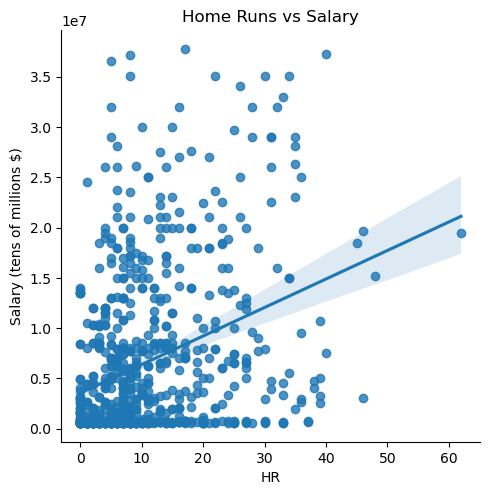

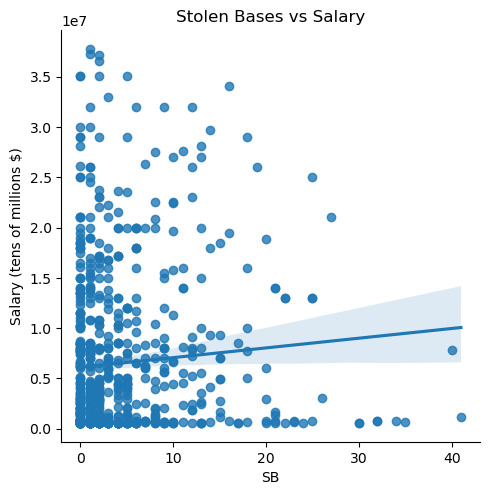

In [16]:
def visual1():
    batter_stats = pd.read_csv("Batter Stats.csv",index_col=0)
    salaries = pd.read_csv("Player Salaries 2020-2022.csv",index_col=0)

    batter_stats_and_salaries = pd.merge(batter_stats, salaries[["playerID", "Salary","Year"]],
                                         how='inner',left_on=['playerID',"yearID"],
                                         right_on=["playerID","Year"])

    sns.lmplot(x="HR",y="Salary",data=batter_stats_and_salaries)
    ax1=plt.gca()
    ax1.set_title("Home Runs vs Salary")
    ax1.set_ylabel("Salary (tens of millions $)")
    sns.lmplot(x="SB",y="Salary",data=batter_stats_and_salaries)
    ax2=plt.gca()
    ax2.set_title("Stolen Bases vs Salary")
    ax2.set_ylabel("Salary (tens of millions $)")






############ Function Call ############
visual1()

### Visualization 1 Explanation

This visual shows the correlation between home runs and salary as well as stolen bases and salary as found in Insight 2. The scatter plots and regression lines show that there is a positive correlation between home runs and salary as the regression line slopes upward, but there is little correlation between stolen bases and salary as the line has very little upward slope.

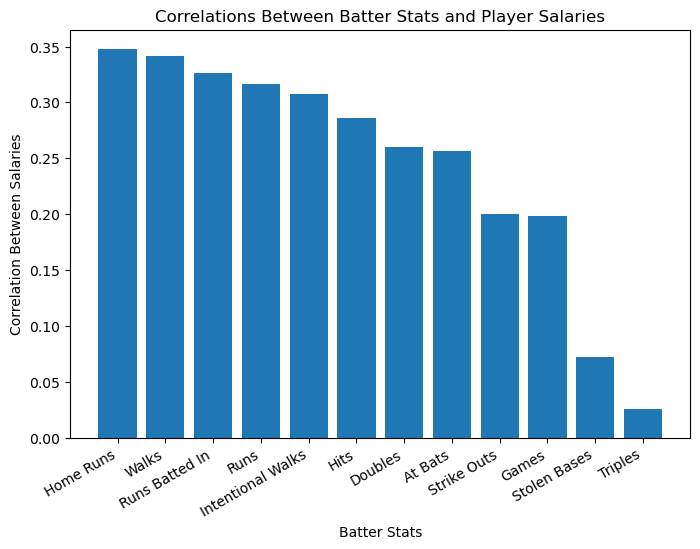

In [18]:
def visual2():
    salaries_correlations = pd.read_csv("Salaries Correlations.csv",index_col=0)
    fig = plt.figure(figsize=(8,6))
    plt.bar(salaries_correlations["Stat"], salaries_correlations["Salary"])
    fig.autofmt_xdate()
    plt.title("Correlations Between Batter Stats and Player Salaries")
    plt.ylabel("Correlation Between Salaries")
    plt.xlabel("Batter Stats")
    plt.show()

############ Function Call ############
visual2()

### Visualization 2 Explanation

This bar chart shows each batter stats' correlation to player salaries which was found in Insight 1. The chart shows that most of the stats have similar correlations that fall between 0.20 and 0.35. We can see that stolen bases and triples have much lower correlations, though.

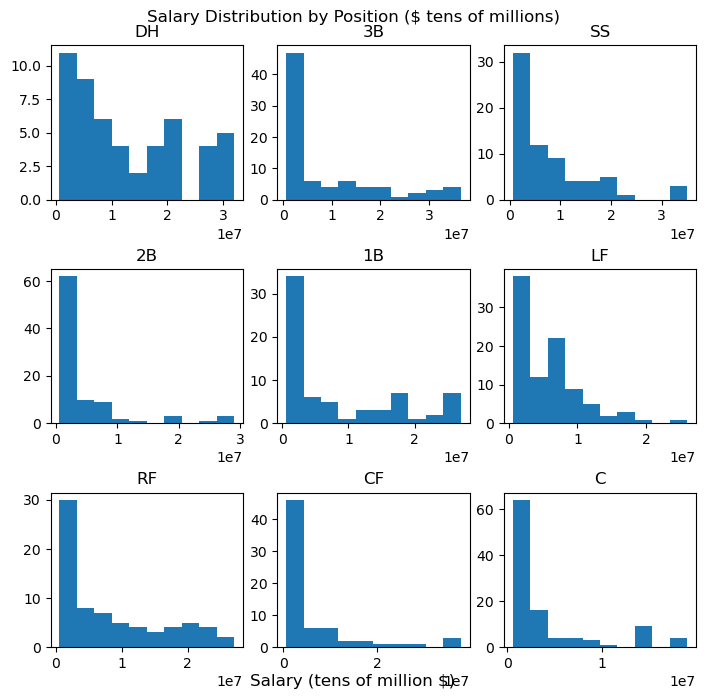

In [19]:
def visual3():
  pos = ["DH","3B","SS","2B","1B","LF","RF","CF","C"]
  fig = plt.figure(figsize=(7,7))
  fig.suptitle("Salary Distribution by Position ($ tens of millions)")
  for i in range(len(pos)):

    plt.subplot(3,3,i+1)
    plt.hist(salaries[salaries["Position"] == pos[i]]["Salary"])
    plt.title(pos[i])

  fig.tight_layout(pad=0.5)
  fig.supxlabel("Salary (tens of million $)")
  plt.show()

############ Function Call ############
visual3()

### Visualization 3 Explanation

These histograms show the distribution of player salaries for each position. One can see that for all the positions, most players have salaries between \$1 million and \$5 million and that there are very few players in comparison with salaries greater then $10 million.

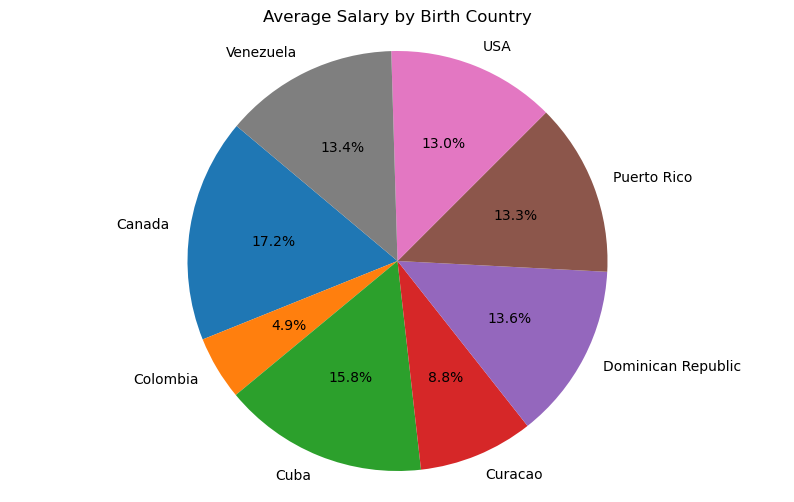

In [20]:
def visual4():
  average_salary_nationality = pd.read_csv("average_salary_nationality.csv")
  average_salary_nationality["AverageSalary"] = average_salary_nationality["AverageSalary"].str.replace(',', '').astype(float)
  plt.figure(figsize=(10, 6))
  plt.pie(average_salary_nationality["AverageSalary"], labels=average_salary_nationality["BirthCountry"], autopct='%1.1f%%', startangle=140)
  plt.axis('equal')
  plt.title("Average Salary by Birth Country")
  plt.show()





############ Function Call ############
visual4()

# Visualization 4 Explanation
This pie chart shows the percentage that each Birth Country of 5 or more MLB players makes on average of all the salaries in the MLB. It can be depicted from this chart that no country has a substancial increase in percentage however it can be noticed that all the countries included are North and South American exemplifying the dominance of the game in these areas.

## Summary Files

In [24]:
def summary1():
    salaries_df = pd.read_csv("Player Salaries 2020-2022.csv", index_col=0)

    salary_by_position_summary = salaries_df.groupby("Position").agg({"Salary":['mean','min','max','sum']})
    salary_by_position_summary.columns=["Mean","Min","Max","Sum"]

    salary_by_position_summary.reset_index(inplace=True)
    salary_by_position_summary.sort_values(by="Mean", ascending=False, inplace=True)

    salary_by_position_summary.index = np.arange(1, len(salary_by_position_summary) + 1)
    salary_by_position_summary.index = salary_by_position_summary.index.rename("Rank")

    all_mean = salary_by_position_summary["Mean"].mean()
    all_min = salary_by_position_summary["Min"].min()
    all_max = salary_by_position_summary["Max"].max()
    all_sum = salary_by_position_summary["Sum"].sum()
    salary_by_position_summary.loc[10] = ["All",all_mean,all_min,all_max,all_sum]

    salary_by_position_summary.to_csv("Summary File Salary Data by Position.csv",index=True)

############ Function Call ############
summary1()

In [26]:
average_salaries_by_position_summary = pd.read_csv("Summary File Salary Data by Position.csv",index_col=0)
average_salaries_by_position_summary

,Position,Mean,Min,Max,Sum
Rank,,,,,
1,DH,1.302221e+07,620000,32000000,664132829
2,3B,8.295587e+06,569750,36571428,671942518
3,1B,8.108358e+06,569750,27000000,559476693
4,RF,7.847996e+06,566025,27000000,565055712
5,SS,7.538482e+06,573500,35100000,527693709
6,CF,5.898474e+06,566200,37766667,401096233
7,LF,5.444035e+06,565500,26000000,506295246
8,2B,4.176398e+06,566000,29000000,380052183
9,C,3.736544e+06,564000,19000000,392337068


# Cited Sources

If you used any additional sources to complete your Data Analysis section, list them here:


*   https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html
*   https://seaborn.pydata.org/generated/seaborn.lmplot.html
*   https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
*   https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
*   https://www.tutorialspoint.com/beautiful_soup/beautiful_soup_quick_guide.htm








# Video Presentation

If you uploaded your Video Presentation to Bluejeans, YouTube, or any other streaming services, please provide the link here:


*   https://youtu.be/I77Xl2ru1Mg


Make sure the video sharing permissions are accessible for anyone with the provided link.

# Submission

Prior to submitting your notebook to Gradescope, be sure to <b>run all functions within this file</b>. We will not run your functions ourselves, so we must see your outputs within this file in order to receive full credit.
